# Import Libraries and Load Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('mushrooms.csv')

# Exploratory Data Analysis (EDA)

## Rectangular EDA

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Un-rectangular EDA

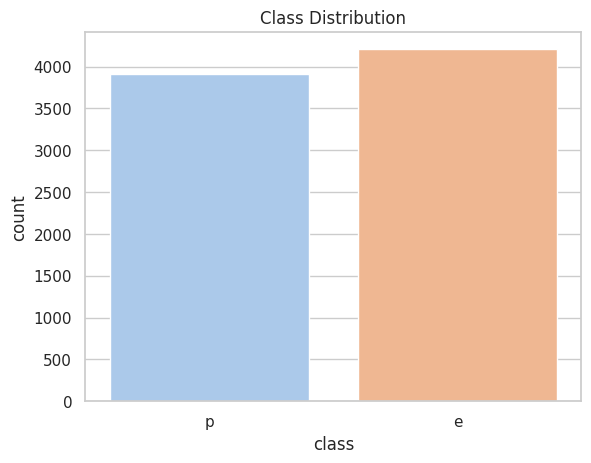

In [ ]:
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

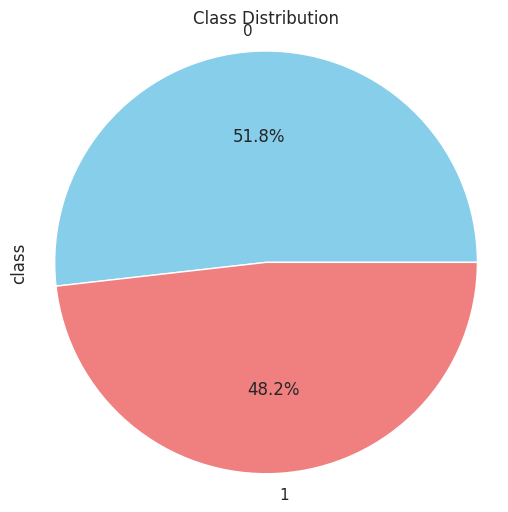

In [ ]:
plt.figure(figsize=(6, 6))
df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Class Distribution")
plt.axis('equal')
plt.show()

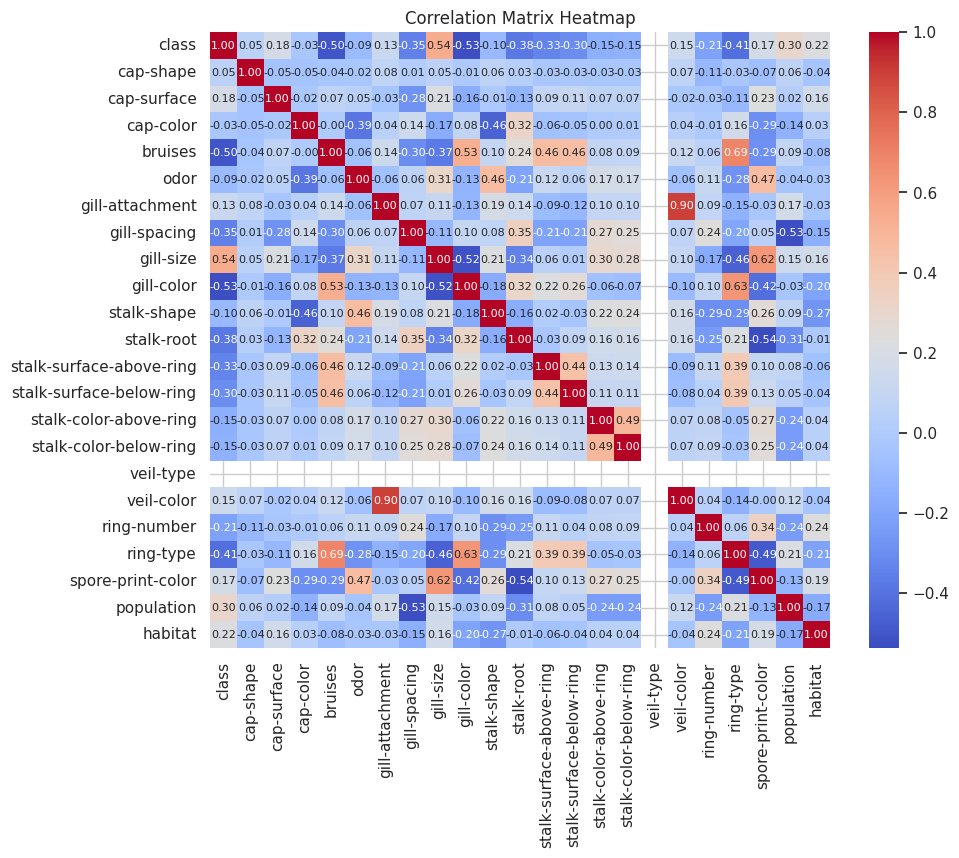

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title("Correlation Matrix Heatmap")
plt.show()

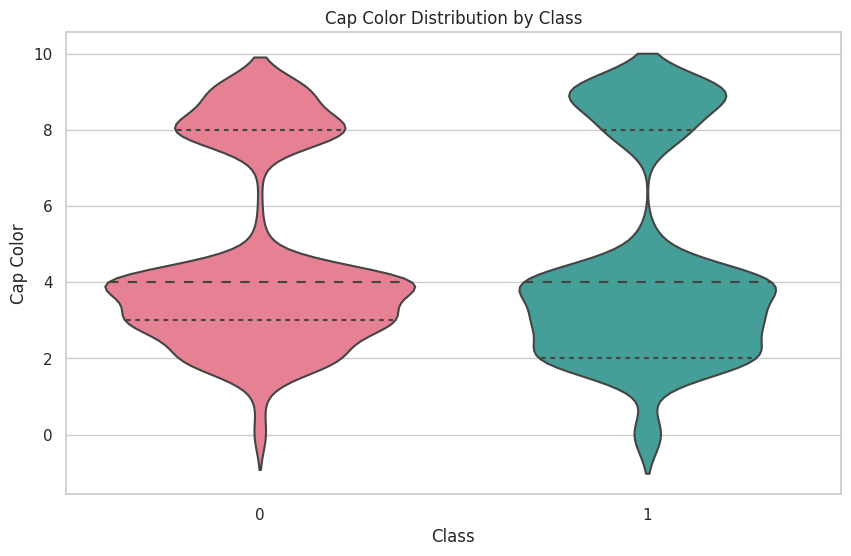

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='class', y='cap-color', data=df, palette='husl', inner='quart')
plt.title("Cap Color Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Cap Color")
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x='bruises', y='odor', hue='class', data=df, palette='husl')
plt.title("Odor Distribution by Bruises and Class")
plt.xlabel("Bruises")
plt.ylabel("Odor")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gill-color', y='stalk-color-above-ring', hue='class', data=df, palette='husl')
plt.title("Gill Color vs. Stalk Color Above Ring by Class")
plt.xlabel("Gill Color")
plt.ylabel("Stalk Color Above Ring")
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='habitat', hue='class', data=df, palette='husl')
plt.title("Habitat Distribution by Class")
plt.xlabel("Habitat")
plt.ylabel("Count")
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

<Figure size 800x600 with 0 Axes>

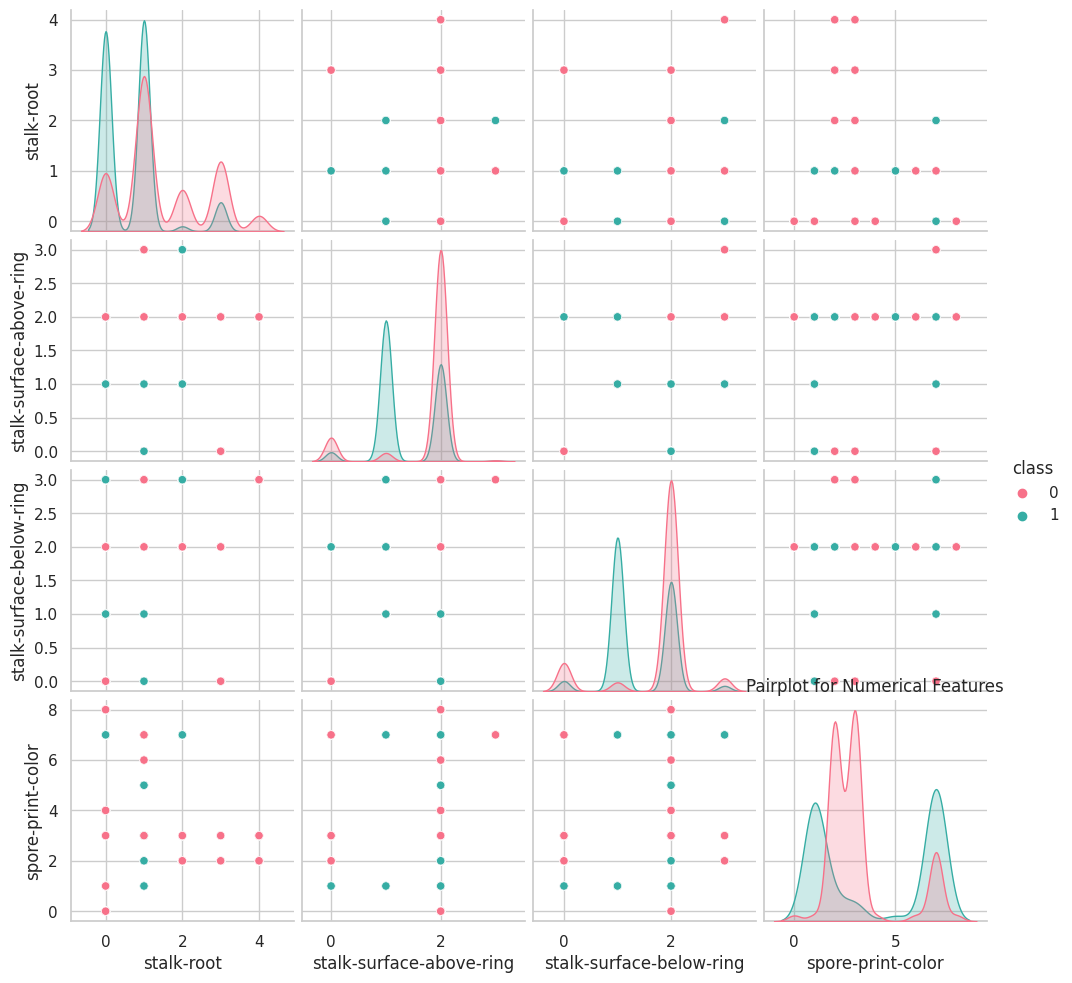

In [ ]:
numerical_features = ['stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'spore-print-color']

plt.figure(figsize=(8, 6))
sns.pairplot(df[numerical_features + ['class']], hue='class', palette='husl')
plt.title("Pairplot for Numerical Features")
plt.show()

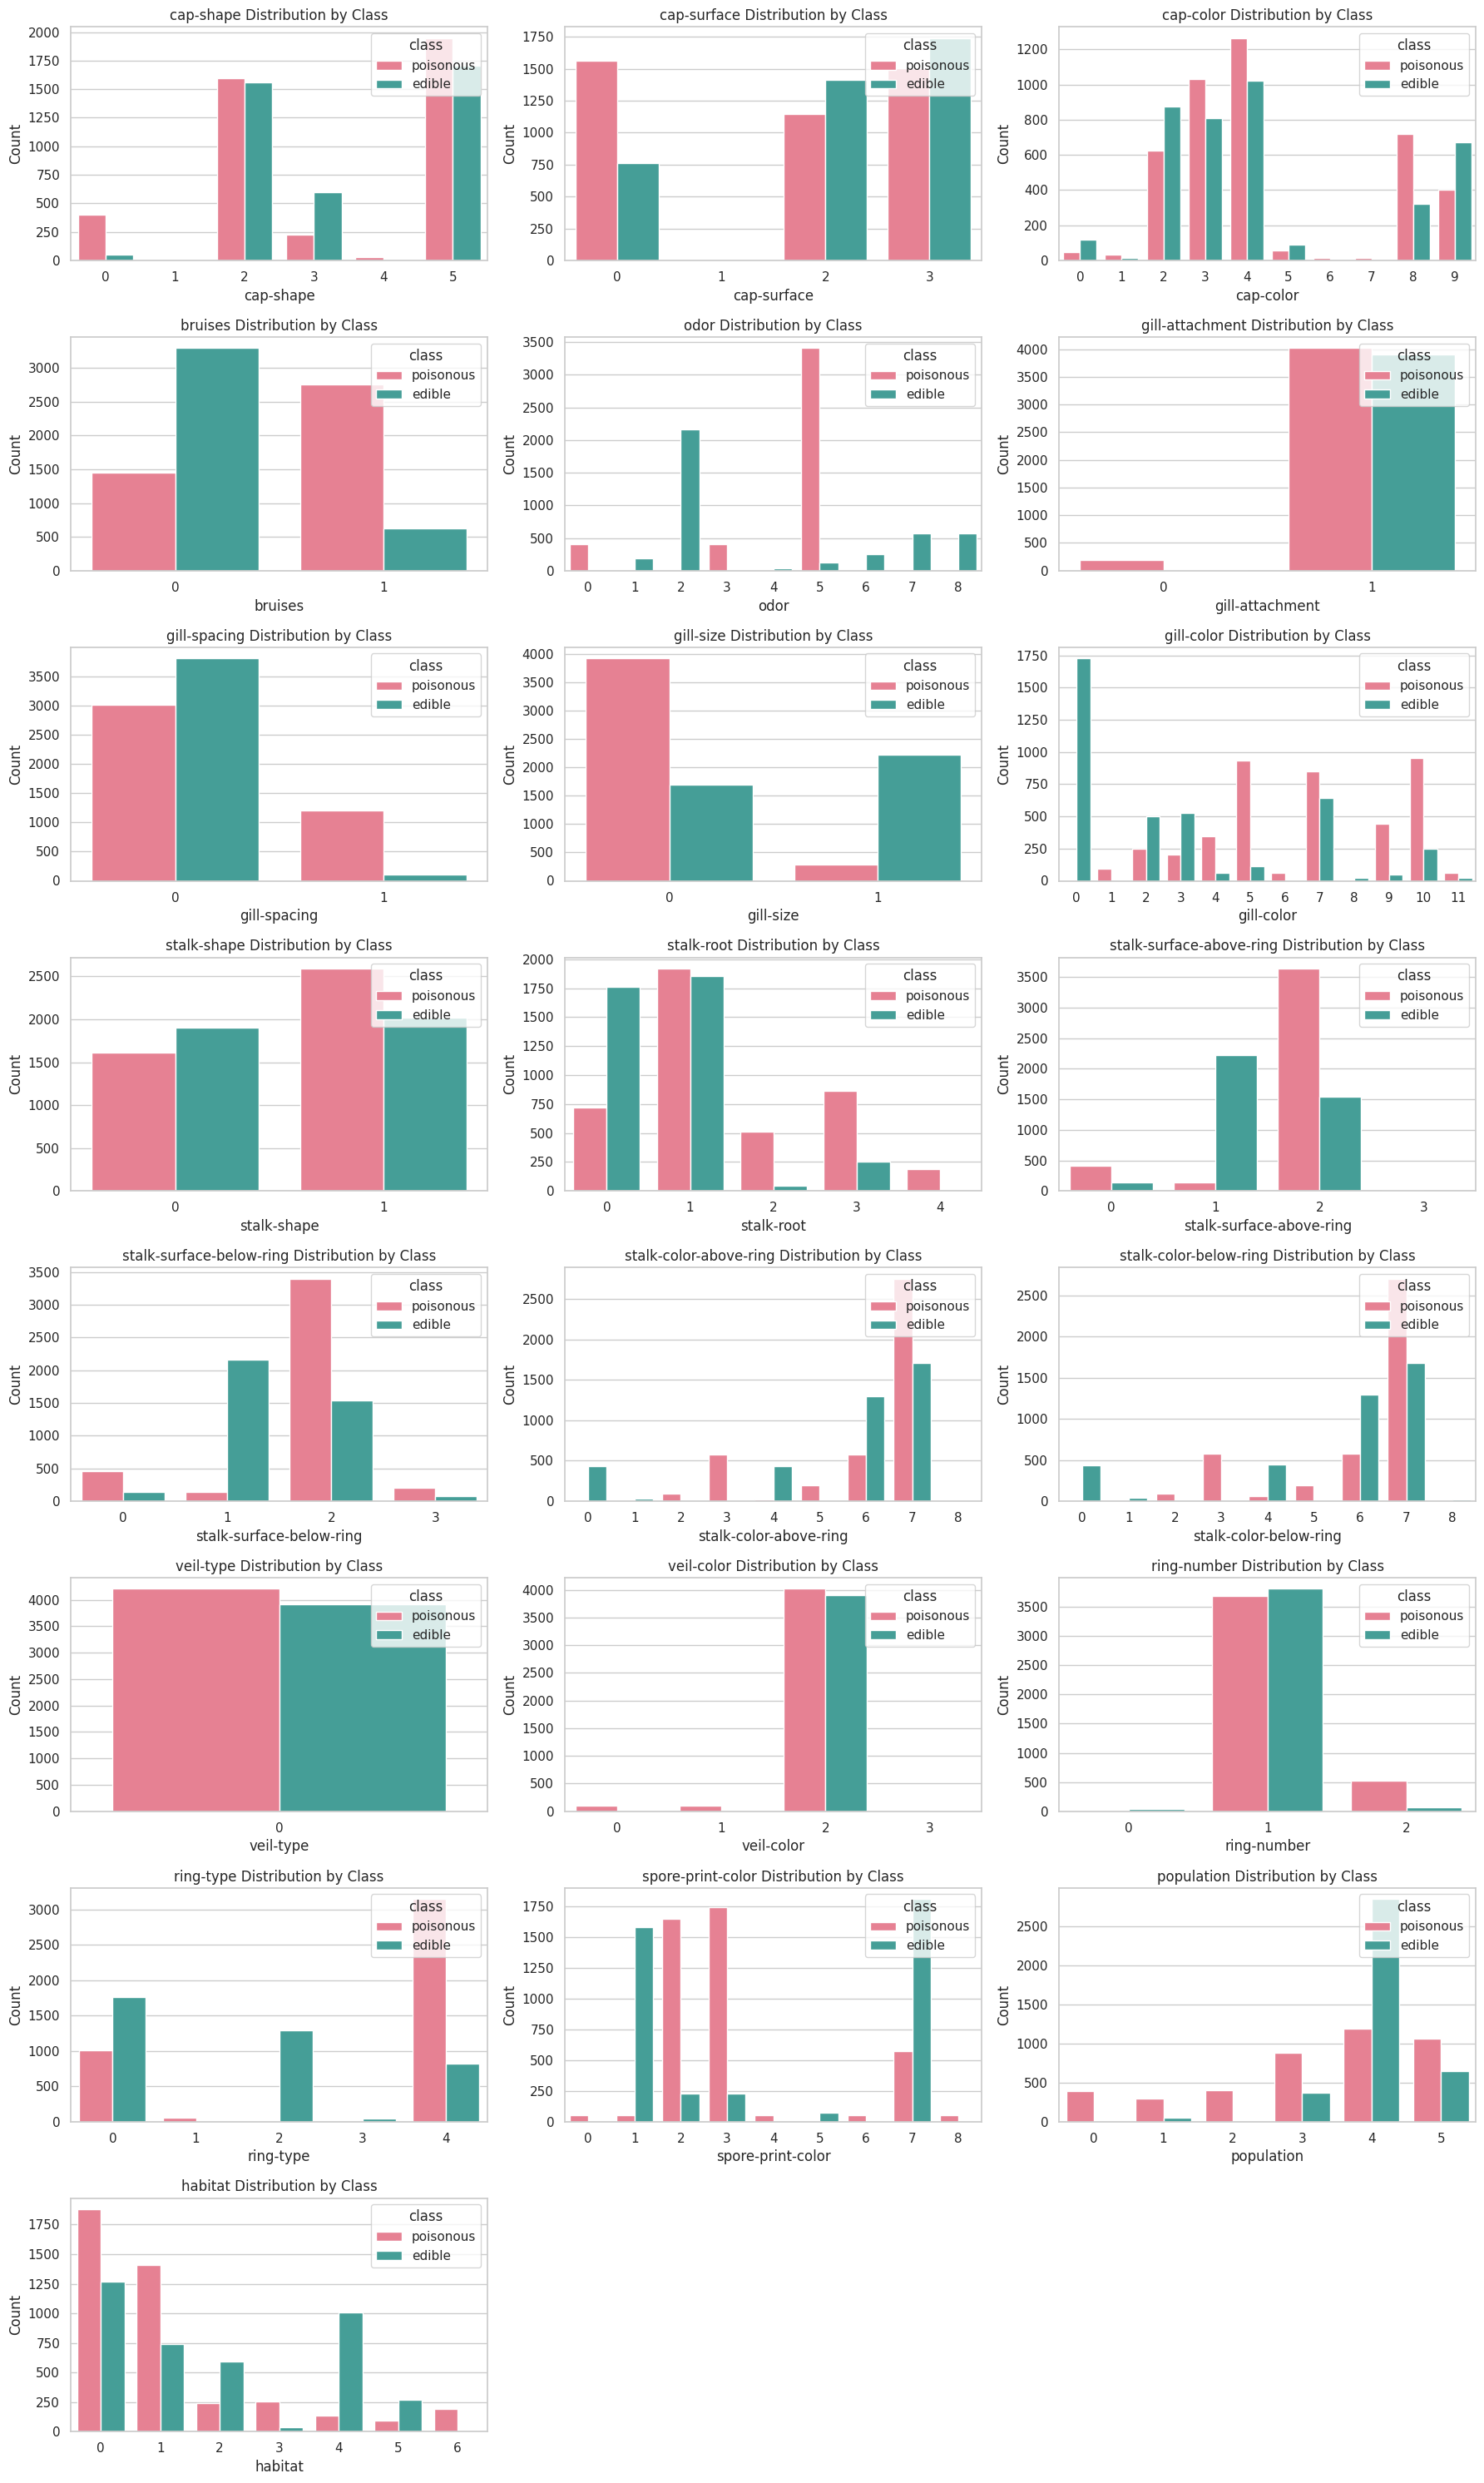

In [ ]:
categorical_features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment','gill-spacing', 'gill-size', 'gill-color',
                        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
                        'stalk-color-below-ring','veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

plt.figure(figsize=(18, 30))
for i, feature in enumerate(categorical_features):
    plt.subplot(8, 3, i+1)
    sns.countplot(x=feature, hue='class', data=df, palette='husl')
    plt.title(f"{feature} Distribution by Class")
    plt.legend(title='class', loc='upper right', labels=['poisonous', 'edible'])
    plt.xlabel(feature)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Model:

## Data Preprocessing for KNN

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])

## Implement KNN to Predict 'class'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from seaborn.palettes import crayons

In [ ]:
x = df.drop('class', axis=1)
y = df['class']

In [ ]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [ ]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6093, 22)
(6093,)
(2031, 22)
(2031,)


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, p = 1)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(p=1)

In [ ]:
y_pred = knn_classifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

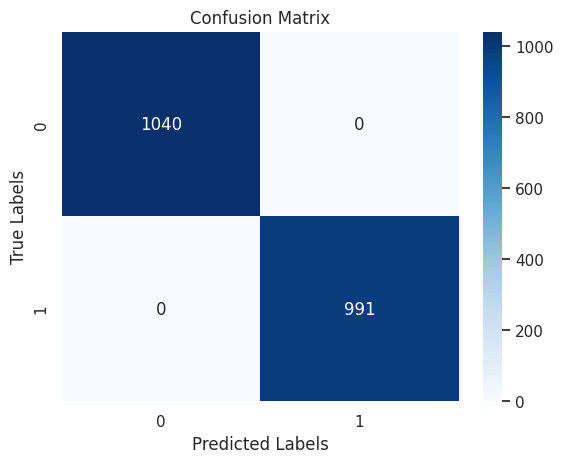

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [ ]:
print(cm)

[[1040    0]
 [   0  991]]


In [ ]:
from sklearn.metrics import accuracy_score

accuracies = []
k_values = [x for x in range(1,50,2)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

In [ ]:
print("Model Accuracy:",acc)

Model Accuracy: 0.9940915805022157


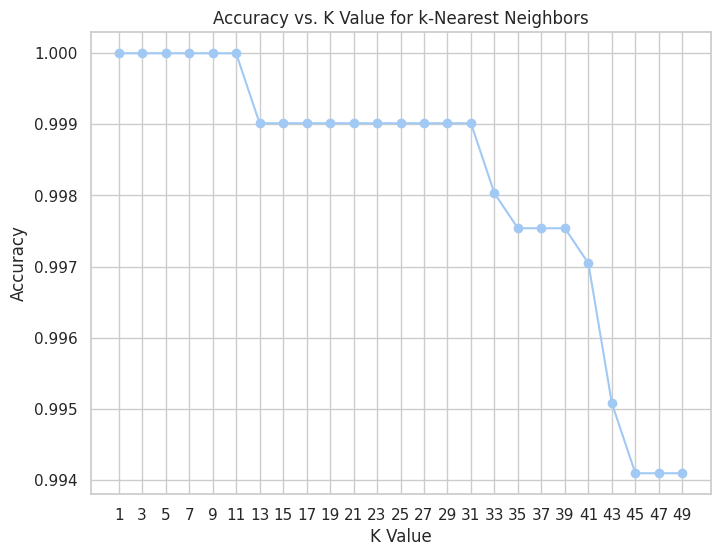

In [ ]:
from sklearn.metrics import accuracy_score
accuracies = []
k_values = [x for x in range(1,50,2)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. K Value for k-Nearest Neighbors")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

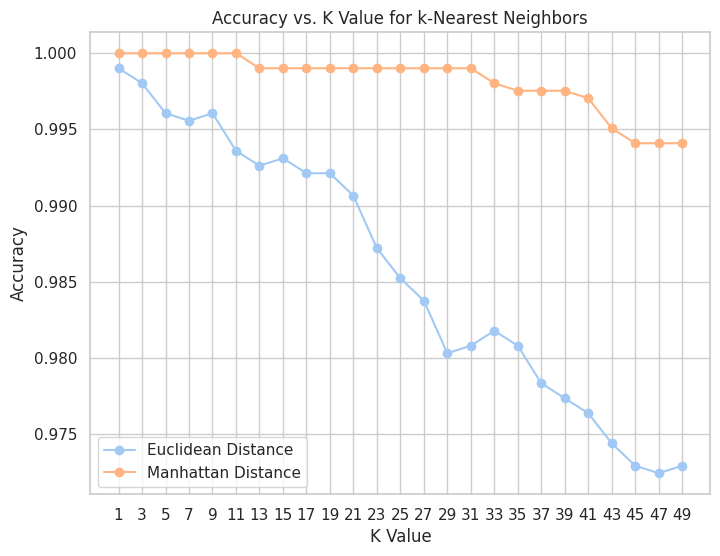

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracies_euclidean = []
accuracies_manhattan = []
k_values = [x for x in range(1, 50, 2)]

for k in k_values:
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, p=2)
    knn_euclidean.fit(x_train, y_train)
    y_pred_euclidean = knn_euclidean.predict(x_test)
    acc_euclidean = accuracy_score(y_test, y_pred_euclidean)
    accuracies_euclidean.append(acc_euclidean)

    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_manhattan.fit(x_train, y_train)
    y_pred_manhattan = knn_manhattan.predict(x_test)
    acc_manhattan = accuracy_score(y_test, y_pred_manhattan)
    accuracies_manhattan.append(acc_manhattan)

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies_euclidean, marker='o', label='Euclidean Distance')
plt.plot(k_values, accuracies_manhattan, marker='o', label='Manhattan Distance')
plt.title("Accuracy vs. K Value for k-Nearest Neighbors")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

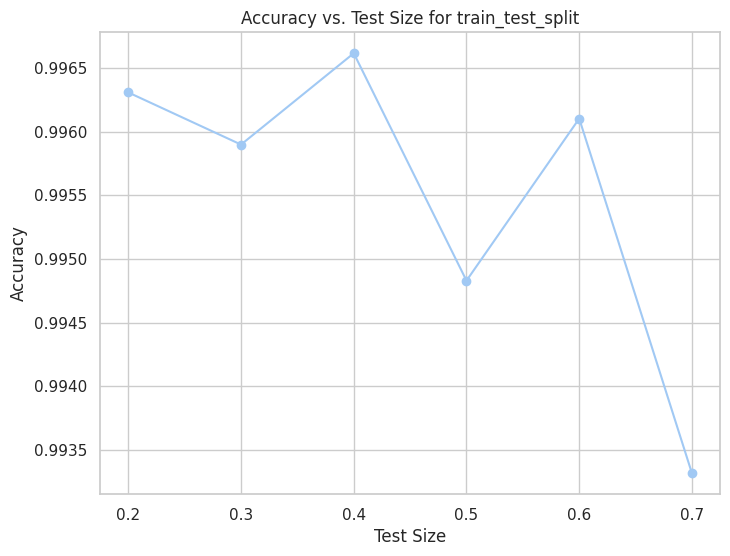

In [ ]:
accuracies_test_size = []
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_test_size.append(acc)

plt.figure(figsize=(8, 6))
plt.plot(test_sizes, accuracies_test_size, marker='o')
plt.title("Accuracy vs. Test Size for train_test_split")
plt.xlabel("Test Size")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

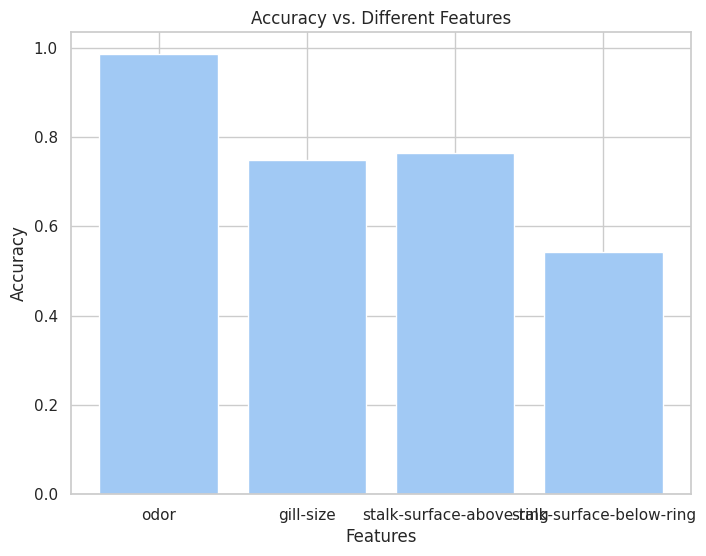

In [ ]:
selected_features = ['odor', 'gill-size', 'stalk-surface-above-ring', 'stalk-surface-below-ring']
accuracies_features = []

for feature in selected_features:
    X_feature = df[[feature]]
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.25, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies_features.append(acc)

plt.figure(figsize=(8, 6))
plt.bar(selected_features, accuracies_features)
plt.title("Accuracy vs. Different Features")
plt.xlabel("Features")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

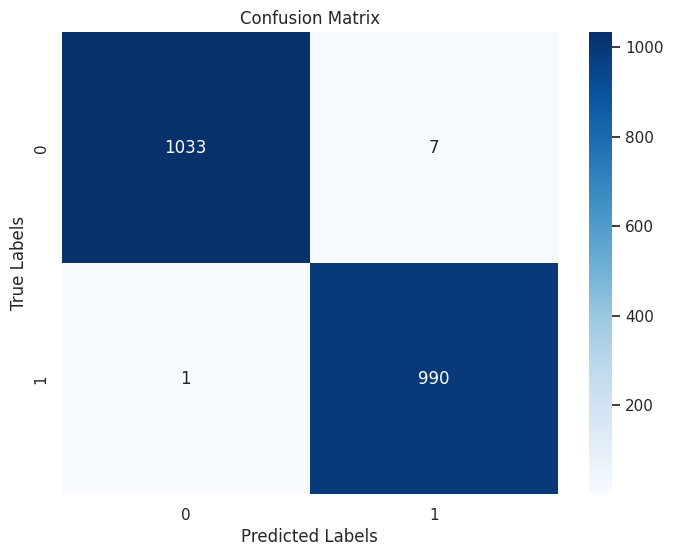

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1040
           1       0.99      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031


Accuracy: 0.9960610536681438


In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(cr)
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc}")

## **0:**

Precision = 1033/(1033+1)

Recall = 1033/(103+7)

## **1:**

Precision = 990/(990+7)

Recall = 990/(990+1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

train_accuracy = clf.score(x_train, y_train)
cv_scores = cross_val_score(clf, x, y, cv=5)
cv_accuracy = cv_scores.mean()

y_pred = clf.predict(x_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print(f"Training Accuracy: {train_accuracy}")
print(f"Cross-Validation Accuracy: {cv_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Training Accuracy: 0.9996717544723454
Cross-Validation Accuracy: 0.8808163698370594
Precision: 0.9929789368104313
Recall: 0.9989909182643795
F1-Score: 0.9959758551307848
